In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
import datetime
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [22]:
# making dateTime column as a index for the test_new panda dataframe
test_new = test_new.set_index('dateTime')

In [23]:
# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2','RWWIHOB_HWT0'
#                            ,'RWWIHOB_MWT0']#rmse error 1.99

# multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
#                              'AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.38

multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','AEDAHO_T9_V2',
                             'RWWIHOB_HWT0','RWWIHOB_MWT0','AEWIHO_T9AV2'] #rmse error 1.94
size_column = len(multivariate_column_label)
print(size_column)

8


In [24]:
size_column = len(multivariate_column_label)
print(size_column)
multivariate_data=test_new.iloc[2000:10000][multivariate_column_label]
multivariate_data=multivariate_data.loc[::-1]

8


In [25]:
multivariate_data.head()

,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
dateTime,,,,,,,,
2019-04-01 10:41:00,100.0,97.700539,97.882738,40.370434,71.079345,94.396188,95.197505,79.651755
2019-04-01 10:42:00,100.0,97.602208,97.759636,40.216788,70.706495,94.318615,95.151028,77.686548
2019-04-01 10:43:00,100.0,97.434917,97.576584,39.823313,70.289996,94.031510,94.982774,76.496477
2019-04-01 10:44:00,100.0,96.856201,97.025646,39.922763,69.994697,94.286623,95.170256,76.661633
2019-04-01 10:45:00,100.0,96.748572,96.909181,39.771485,70.138749,94.273834,95.158246,76.051026


In [26]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in multivariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  5


In [27]:
if zero_index.size > 0:
    multivariate_data_modify = multivariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    multivariate_data_modify = multivariate_data

In [28]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

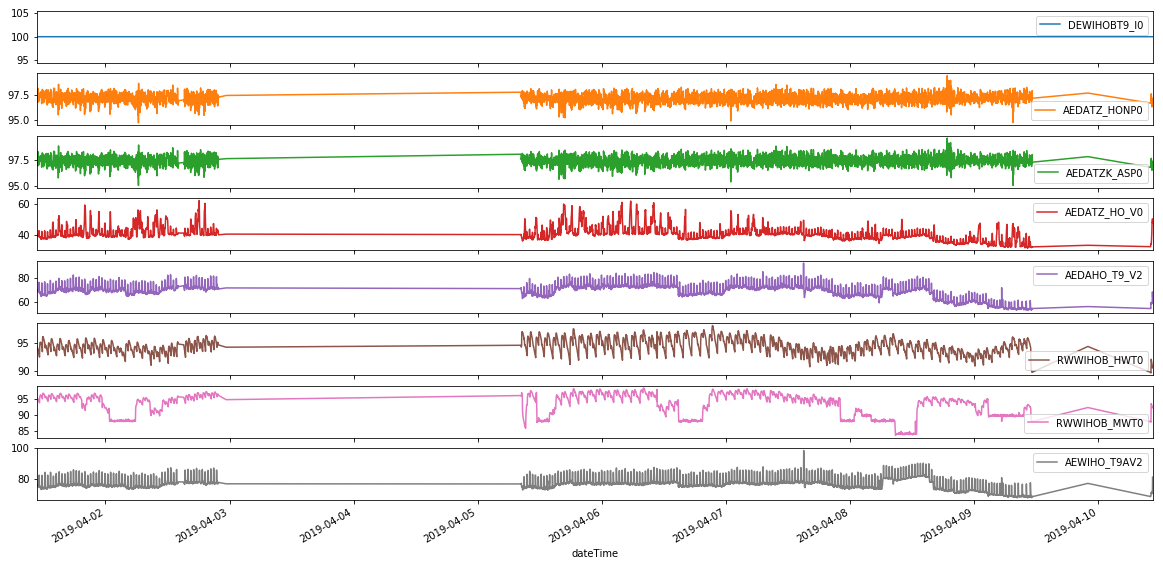

In [29]:
cx = multivariate_data_drop_zero.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [30]:
multivariate_data_drop_zero_resample = multivariate_data_drop_zero.resample('1min').mean()

In [31]:
multivariate_data_drop_zero_interpolate = multivariate_data_drop_zero_resample.interpolate('linear')

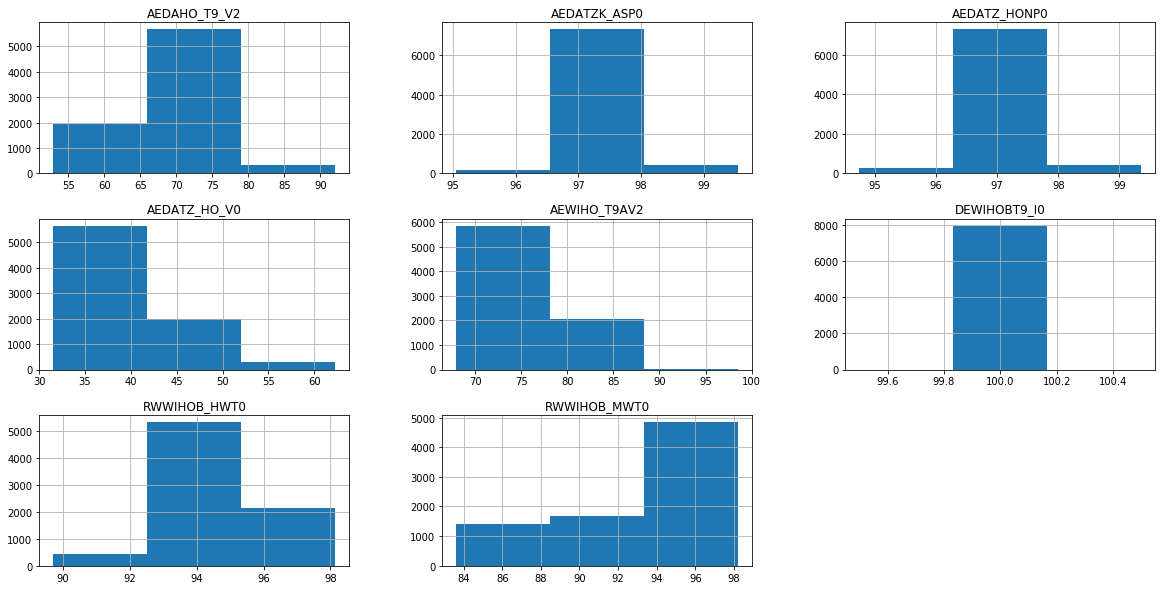

In [32]:
hist = multivariate_data_drop_zero.hist(bins=3)

In [33]:
# print(len(multivariate_column_label))
for idx, i in enumerate(multivariate_column_label):
    now_idx = idx+1
    
    if now_idx == len(multivariate_column_label):
        print('terminate')
        break
    print(multivariate_column_label[now_idx])
    drop_consecutive_same_value_zero = multivariate_data_drop_zero.loc[multivariate_data_drop_zero[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero[multivariate_column_label[now_idx]]]
    drop_consecutive_same_value_interpolate = multivariate_data_drop_zero_interpolate.loc[multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]]]

AEDATZ_HONP0
AEDATZK_ASP0
AEDATZ_HO_V0
AEDAHO_T9_V2
RWWIHOB_HWT0
RWWIHOB_MWT0
AEWIHO_T9AV2
terminate


In [34]:
new_dataframe = drop_consecutive_same_value_zero.drop(['DEWIHOBT9_I0'], axis=1)
# new_dataframe = drop_consecutive_same_value_interpolate.drop(['DEWIHOBT9_I0'], axis=1)

In [35]:
new_dataframe.corr()

,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
AEDATZ_HONP0,1.000000,0.986607,-0.375157,-0.161240,-0.052884,-0.066476,-0.042117
AEDATZK_ASP0,0.986607,1.000000,-0.303132,-0.108016,-0.045979,-0.045416,0.018198
AEDATZ_HO_V0,-0.375157,-0.303132,1.000000,0.612193,0.142894,0.269080,0.395302
AEDAHO_T9_V2,-0.161240,-0.108016,0.612193,1.000000,0.149537,0.359298,0.768550
RWWIHOB_HWT0,-0.052884,-0.045979,0.142894,0.149537,1.000000,0.246607,-0.005621
RWWIHOB_MWT0,-0.066476,-0.045416,0.269080,0.359298,0.246607,1.000000,0.104084
AEWIHO_T9AV2,-0.042117,0.018198,0.395302,0.768550,-0.005621,0.104084,1.000000


In [36]:
new_dataframe_1 = new_dataframe.drop(['RWWIHOB_HWT0','RWWIHOB_MWT0'], axis=1)

In [37]:
dataset=np.array(new_dataframe_1)
print(dataset)

[[97.70053907 97.88273831 40.37043387 71.07934514 79.65175538]
 [97.60220829 97.75963616 40.21678762 70.70649495 77.68654838]
 [97.43491689 97.57658387 39.82331314 70.28999611 76.49647666]
 ...
 [96.53790457 96.75751513 50.41859112 68.23329342 72.86208632]
 [96.63204238 96.86671002 50.34751166 67.65155466 79.19781049]
 [96.8666347  97.10142064 48.91162422 64.43432778 81.38228262]]


# VANILLA LSTM

In [42]:
NumberOfElements=int(len(dataset)*0.9)
print('dataset length: ',len(dataset))
print('Number of Elements for training: ',NumberOfElements)

multiple_ip_train_data=dataset[0:NumberOfElements]
print(multiple_ip_train_data.shape)
multiple_ip_test_set=dataset[NumberOfElements:len(dataset)]
print(multiple_ip_test_set.shape)

dataset length:  7930
Number of Elements for training:  7137
(7137, 5)
(793, 5)


# In the following line tried to understand the concept of split sequence function

In [40]:
# from numpy import array
 
# # split a univariate sequence into samples
# def split_sequence(sequence, n_steps):
#     print(len(sequence))
#     X, y = list(), list()
#     for i in range(len(sequence)):
#         # find the end of this pattern
#         end_ix = i + n_steps
#         # check if we are beyond the sequence
#         if end_ix > len(sequence)-1:
#             break
#         # gather input and output parts of the pattern
#         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
#         print('printing i and end_ix : ',i,'\t',end_ix)
#         print('\nprinting seqence:',sequence[i:end_ix],'\t',sequence[end_ix])
#         X.append(seq_x)
#         y.append(seq_y)
#     return array(X), array(y)


# x=array([[2],[4],[5],[6],[7]])

# X_train,Y_train=split_sequence(x,2)
# print(x.shape[1])
# n_features=1
# v=array([[[2,3,2]],[[4,5,7]]])
# print(v.shape)

In [41]:
# n= array([[[2,3]]])
# print(n.shape)
# # print(n)
# m=n.reshape(n.shape[2],n.shape[1],n.shape[0])
# print(m.shape)
# print(m)

# split_sequence function

In [43]:
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    print(len(sequence))
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix,:-1], sequence[end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# choose a number of time steps
n_steps = 1
# split into samples
X_train_vanilla, y_train_vanilla = split_sequence(multiple_ip_train_data, n_steps)
# print(X.shape,'\t',X.ndim,'\t',X.size)
# print(y.shape,'\t',y.ndim,'\t',y.size)
print(X_train_vanilla.shape,'\t',X_train_vanilla.ndim,'\t',X_train_vanilla.size)
print(y_train_vanilla.shape,'\t',y_train_vanilla.ndim,'\t',y_train_vanilla.size)
# summarize the data
# for i in range(len(X)):
# 	print(X[i], y[i])

7137
(7136, 1, 4) 	 3 	 28544
(7136,) 	 1 	 7136


In [45]:
n_features = X_train_vanilla.shape[-1]
X_train_vanilla = X_train_vanilla.reshape((X_train_vanilla.shape[0], X_train_vanilla.shape[1], n_features))

In [46]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

C:\Users\atif\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [48]:
lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs=30

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
train_model=model.fit(X_train_vanilla, y_train_vanilla, batch_size=batch_size, epochs=epochs, verbose=1,
          callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/vanilla_100.h5', save_best_only=True)])


Epoch 1/30
7136/7136 [==============================] - 1s 207us/step - loss: 164.7689 - acc: 0.0000e+00
Epoch 2/30
2176/7136 [========>.....................] - ETA: 0s - loss: 6.6810 - acc: 0.0000e+00

C:\Users\atif\Anaconda3\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


7136/7136 [==============================] - 0s 68us/step - loss: 6.5447 - acc: 0.0000e+00
Epoch 3/30
7136/7136 [==============================] - 0s 68us/step - loss: 6.1791 - acc: 0.0000e+00
Epoch 4/30
7136/7136 [==============================] - 0s 64us/step - loss: 5.8109 - acc: 0.0000e+00
Epoch 5/30
7136/7136 [==============================] - 1s 88us/step - loss: 5.5280 - acc: 0.0000e+00
Epoch 6/30
7136/7136 [==============================] - 0s 66us/step - loss: 5.1063 - acc: 0.0000e+00
Epoch 7/30
7136/7136 [==============================] - 1s 74us/step - loss: 4.8705 - acc: 0.0000e+00
Epoch 8/30
7136/7136 [==============================] - 1s 81us/step - loss: 4.6532 - acc: 0.0000e+00
Epoch 9/30
7136/7136 [==============================] - 1s 75us/step - loss: 4.5999 - acc: 0.0000e+00
Epoch 10/30
7136/7136 [==============================] - 0s 67us/step - loss: 4.7039 - acc: 0.0000e+00
Epoch 11/30
7136/7136 [==============================] - 0s 66us/step - loss: 4.1898 - acc: 

In [48]:
# this line of code you can use if you want to save model as JSON file then .h5 format
# serialize model to JSON
# model_json = model.to_json()
# with open("VanillaLSTM_model.json", "w") as json_file:
#     json_file.write(model_json)
# serialize weights to HDF5
# model.save_weights("VanillaLSTM_model.h5")
# print("Saved model to disk")

In [49]:
test_ip_vanilla,test_op_vanilla=split_sequence(multiple_ip_test_set,n_steps)
n_features_test = test_ip_vanilla.shape[-1]
X_test_ip_vanilla=test_ip_vanilla.reshape((test_ip_vanilla.shape[0], test_ip_vanilla.shape[1], n_features_test))

793


In [50]:
yhat = model.predict(X_test_ip_vanilla, verbose=1)
# print(yhat)

792/792 [==============================] - 0s 188us/step


In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from statsmodels import robust

#Print MSE to see how good the model is
Error = mean_squared_error(test_op_vanilla,yhat)
MAE = mean_absolute_error(test_op_vanilla, yhat)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))

mean squared error:  2.8868631087285506
RMSE Error:  1.699077134425789


In [56]:
predicted_output = yhat
test_output = test_op_vanilla
test_output = np.reshape(test_output,(-1,1))

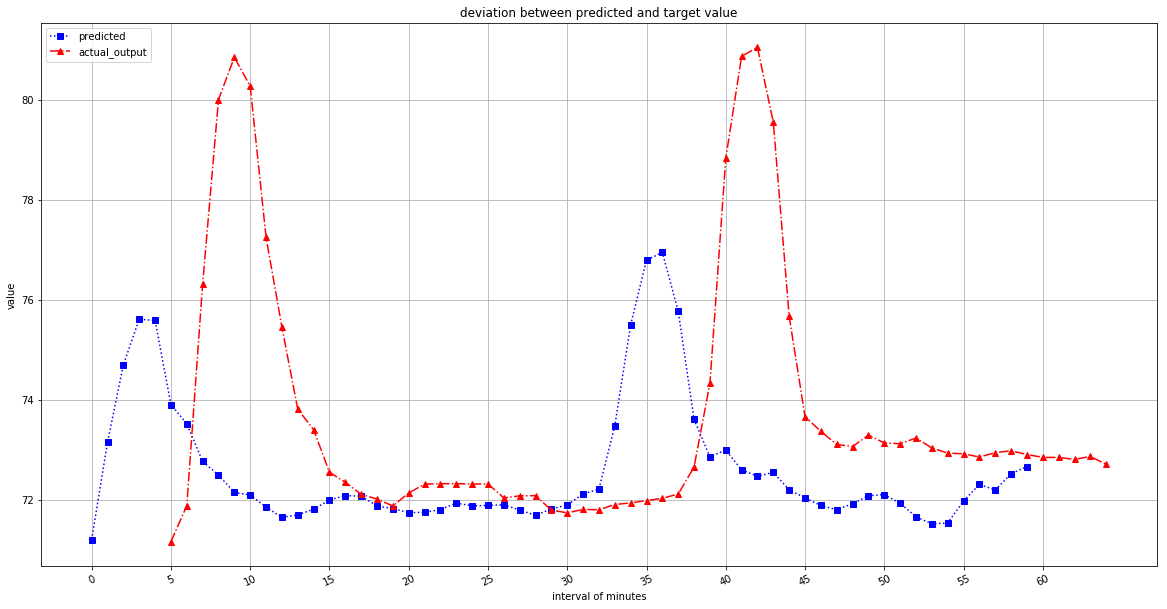

In [57]:
actual_data = range(65)


plt.plot(predicted_output[:60],color='blue',marker='s', linestyle=':')
plt.plot(actual_data[5:], test_output[:60],color='red',marker='^', linestyle='-.')
# plt.plot(yhat[51:99],color='black',marker='s', linestyle=':')
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('interval of minutes')
plt.legend(['predicted','actual_output'], loc='upper left')
plt.grid(b=None, which='both', axis='both')
plt.xticks(np.arange(0,65,5))
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

<class 'numpy.ndarray'>


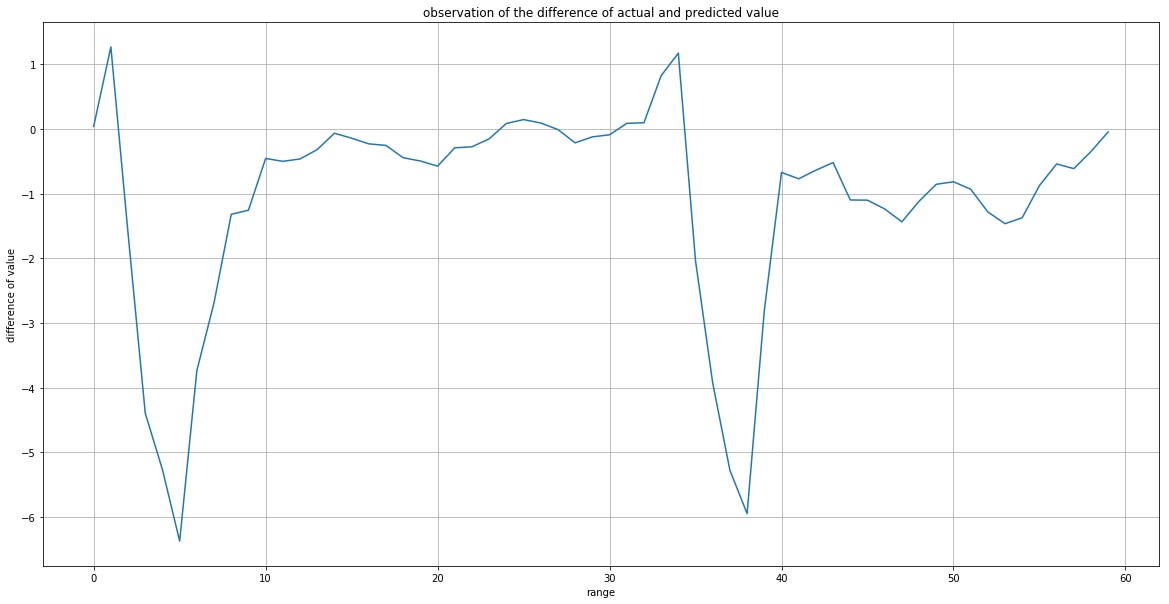

In [58]:
# try to draw a graph where I will plot only the differences between actual and predicted value.
# %matplotlib qt

difference_of_value = predicted_output - test_output
print(type(difference_of_value))

plt.plot(difference_of_value[0:60])
plt.title('observation of the difference of actual and predicted value')

# plt.rcParams['xtick.labelsize']=2
# plt.rcParams['ytick.labelsize']=2
# plt.tick_params(labelsize=20)
plt.ylabel('difference of value')
plt.xlabel('range')
plt.grid(b=None, which='both', axis='both')
# plt.savefig('difference_of_actual_and_predicted_value.png')
plt.show()

# here trying to load saved model file. It will help to save time to test without training every time

In [74]:
# from keras.models import model_from_json
# # load json and create model
# json_file = open('VanillaLSTM_model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("VanillaLSTM_model.h5")
# print("Loaded model from disk")

In [75]:
# # loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# # score = loaded_model.evaluate(X, Y, verbose=0)
# # print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
# yhat_new= loaded_model.predict(X_test_ip_vanilla, verbose=1)

In [76]:
# # my_data_1.index[0:-1]
# plt.plot(yhat_new,color='green')
# plt.plot(test_op_vanilla,color='red')
# plt.xticks( rotation=25)
# plt.show()

In [77]:
# from sklearn.metrics import mean_squared_error

# #Print MSE to see how good the model is
# Error = mean_squared_error(test_op_vanilla,yhat_new)
# print(Error)

# Here try to load model file which has saved directly in the phase of training as .h5 format.

In [18]:
from keras.models import load_model

load_trained_model=load_model('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/vanilla_100.h5')

Using TensorFlow backend.


In [19]:
y_pred=load_trained_model.predict(X_test_ip_vanilla)

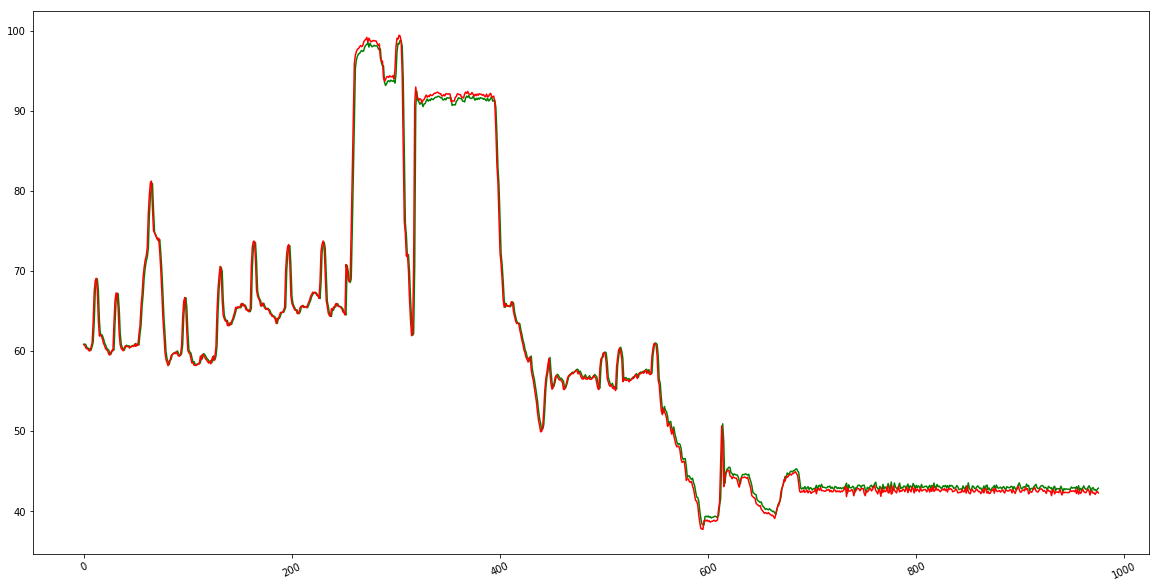

In [20]:
plt.plot(y_pred,color='green')
plt.plot(test_op_vanilla,color='red')
plt.xticks( rotation=25)
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_op_vanilla,y_pred)
print(Error)

1.8510196037919036


# what is forecasting ???

In [ ]:
# y_forecast=load_trained_model.for

# making completey new test data

In [85]:
test_value=test_new.loc[24000:24050,['dateTime','AEDAHO_T9_V2']]
test_value= test_value.set_index('dateTime')
test_value=test_value.loc[::-1]
test_value_array=np.array(test_value)
test_value_array=test_value_array[0:len(test_value_array)]

In [65]:
# no=len(test_value)
# print(type(no))
# print(no)
# print(type(test_value))

In [86]:
test_ip_vanilla_1,test_op_vanilla_1=split_sequence(test_value_array,n_steps)
X_test_ip_vanilla_1=test_ip_vanilla_1.reshape((test_ip_vanilla_1.shape[0], test_ip_vanilla_1.shape[1], n_features))

51


In [87]:
y_pred_2=load_trained_model.predict(X_test_ip_vanilla_1)

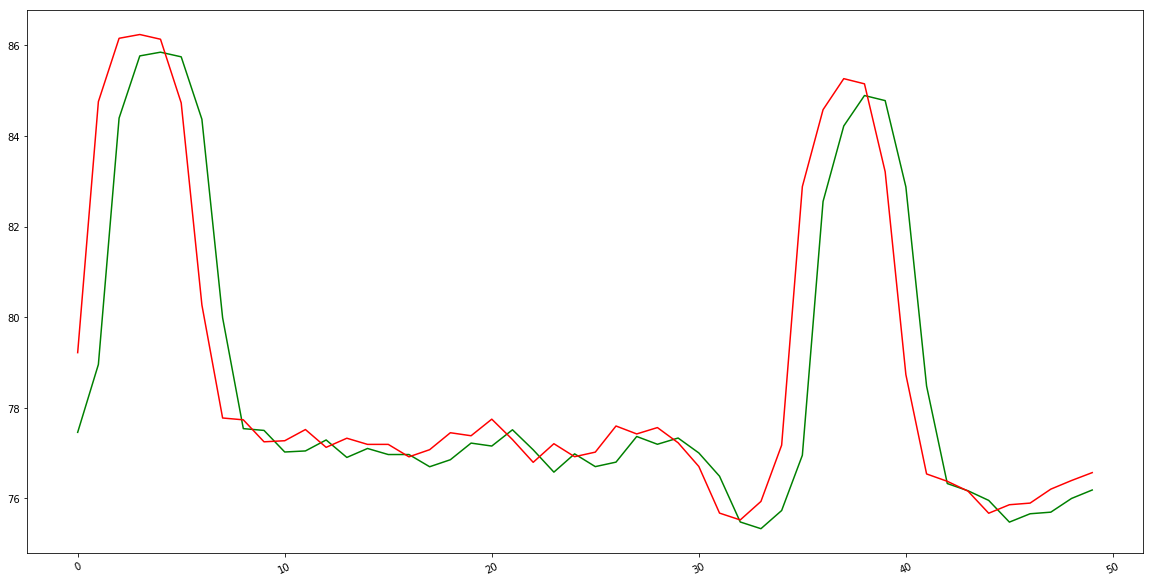

In [88]:
plt.plot(y_pred_2,color='green')
plt.plot(test_op_vanilla_1,color='red')
plt.xticks( rotation=25)
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_op_vanilla,y_pred)
print(Error)

1.8519889186863447


In [93]:
from math import sqrt
def rmse(actual,pred):
    rmse=(mean_squared_error(actual,pred))
    return rmse

rmse_test=rmse(test_op_vanilla,y_pred)
print(rmse_test)

1.8519889186863447


# To check the index value where values are zero

In [33]:
# univariate_data.loc[univariate_data['AEDAHO_T9_V2']==0]